<a href="https://colab.research.google.com/github/GeorgiyAleksanyan/14-332-472-01-ROBOTICS-COMP-VISION-Classify-ImageNet-classes-with-ResNet50-/blob/main/ga360_RCV_14_332_472_Project_1_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classify ImageNet classes with ResNet50** Using pytorch, set up the pre-trained network ResNet50. Obtain 10 of your own images that are similar to Imagenet classes and classify them. Choose 10 images from 5 different classes (2 images per class). Report the confusion matrix, the accuracy, the f-score, precision and recall of your classifier. Write a paragraph describing ResNet.
**Special Thanks to the following people for providing the images for this project:**


0. Photo 0_0 by <a href="https://unsplash.com/@choudharyankith?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Ankith Choudhary</a> on <a href="https://unsplash.com/photos/honeybee-perched-on-yellow-flower-in-close-up-photography-during-daytime-AbBZKCPzLQQ?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

1. Photo 0_1 by <a href="https://unsplash.com/@milverton?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Michael Milverton</a> on <a href="https://unsplash.com/photos/black-and-yellow-bee-in-close-up-photography-FpFkjVDALnI?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  
2. lynx: Photo 1_0 by <a href="https://unsplash.com/@zmachacek?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Zdeněk Macháček</a> on <a href="https://unsplash.com/photos/brown-lynx-cat-sSEEbAzB6fU?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

3. lynx: Photo 1_1 by <a href="https://unsplash.com/@zmachacek?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Zdeněk Macháček</a> on <a href="https://unsplash.com/photos/brown-and-black-cat-on-snow-covered-ground-k8z65TBa9dY?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

4. mangoose: Photo 2_0 by <a href="https://unsplash.com/@chandan_siddu?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Chandan Siddaramaia</a> on <a href="https://unsplash.com/photos/brown-and-white-animal-on-brown-wood-U5ANPofqlxM?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

5. mangoose: Photo 2_1 by <a href="https://unsplash.com/@veverkolog?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Dušan veverkolog</a> on <a href="https://unsplash.com/photos/brown-animal-standing-on-brown-field-vA_f4gPmg1w?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

6. obelisk: Photo 3_0 by <a href="https://unsplash.com/@sofiavilaflor?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Sofia Vila Flor</a> on <a href="https://unsplash.com/photos/white-concrete-tower-under-blue-sky-during-daytime-Ao-9mKqRAjo?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

7. obelisk: Photo 3_1 by <a href="https://unsplash.com/@louishansel?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Louis Hansel</a> on <a href="https://unsplash.com/photos/brown-obelisk-NDjDJW-fkPI?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

8. cock: Photo 4_0 by <a href="https://unsplash.com/@dareen0987?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">榮達 陳</a> on <a href="https://unsplash.com/photos/white-and-brown-hen-standing-on-gray-concrete-surface-iHzpnUYS3Zc?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

9. cock: Photo 4_1 by <a href="https://unsplash.com/@rosyid144?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Muhammad Rosyid</a> on <a href="https://unsplash.com/photos/a-rooster-standing-on-the-ground-in-a-forest-XH5QvKL2AL0?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>


In [2]:
!pip install validators matplotlib

In [3]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cpu for inference


In [4]:
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/resnet50_pyt_amp/versions/20.06.0/files/nvidia_resnet50_200821.pth.tar" to /root/.cache/torch/hub/checkpoints/nvidia_resnet50_200821.pth.tar
100%|██████████| 97.7M/97.7M [00:03<00:00, 27.2MB/s]
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layers): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

In [5]:
uris = [
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_0_0.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_0_1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_1_0.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_1_1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_2_0.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_2_1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_3_0.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_3_1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_4_0.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Project 1/Input Data/image_4_1.jpg',
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

In [6]:
with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(batch), dim=1)

results = utils.pick_n_best(predictions=output, n=5)
print(results)

sample 0: [('bee', '82.1%'), ('fly', '1.4%'), ('apiary, bee house', '0.4%'), ('honeycomb', '0.2%'), ('rapeseed', '0.2%')]
sample 1: [('bee', '77.9%'), ('honeycomb', '1.3%'), ('apiary, bee house', '0.5%'), ('cardoon', '0.4%'), ('fly', '0.3%')]
sample 2: [('lynx, catamount', '79.6%'), ('chambered nautilus, pearly nautilus, nautilus', '0.1%'), ('torch', '0.1%'), ('cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', '0.1%'), ('pole', '0.1%')]
sample 3: [('lynx, catamount', '76.8%'), ('leopard, Panthera pardus', '0.2%'), ('ruffed grouse, partridge, Bonasa umbellus', '0.2%'), ('chambered nautilus, pearly nautilus, nautilus', '0.1%'), ('Egyptian cat', '0.1%')]
sample 4: [('meerkat, mierkat', '66.8%'), ('mongoose', '7.0%'), ('marmot', '0.1%'), ('fox squirrel, eastern fox squirrel, Sciurus niger', '0.1%'), ('black-footed ferret, ferret, Mustela nigripes', '0.1%')]
sample 5: [('mongoose', '87.8%'), ('meerkat, mierkat', '0.2%'), ('guenon, guenon monkey', '0.1%'), ('indri, i

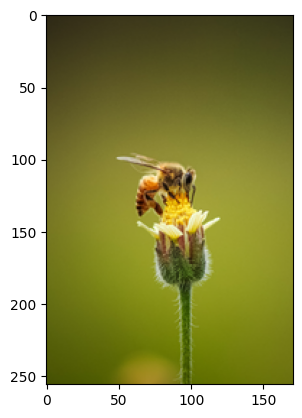

[('bee', '82.1%'), ('fly', '1.4%'), ('apiary, bee house', '0.4%'), ('honeycomb', '0.2%'), ('rapeseed', '0.2%')]


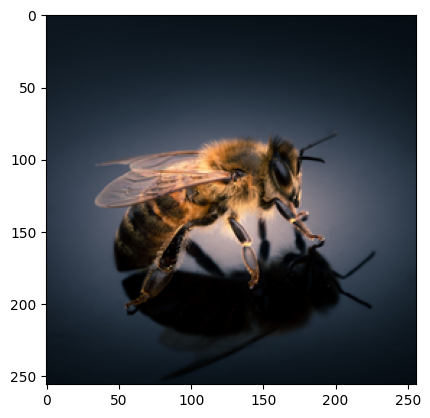

[('bee', '77.9%'), ('honeycomb', '1.3%'), ('apiary, bee house', '0.5%'), ('cardoon', '0.4%'), ('fly', '0.3%')]


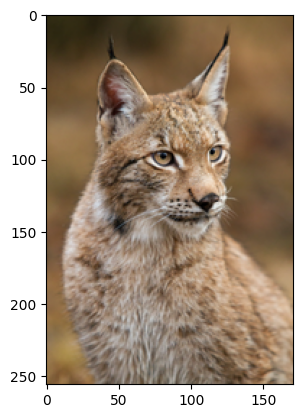

[('lynx, catamount', '79.6%'), ('chambered nautilus, pearly nautilus, nautilus', '0.1%'), ('torch', '0.1%'), ('cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', '0.1%'), ('pole', '0.1%')]


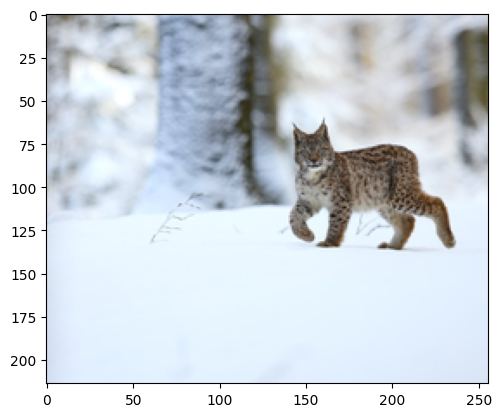

[('lynx, catamount', '76.8%'), ('leopard, Panthera pardus', '0.2%'), ('ruffed grouse, partridge, Bonasa umbellus', '0.2%'), ('chambered nautilus, pearly nautilus, nautilus', '0.1%'), ('Egyptian cat', '0.1%')]


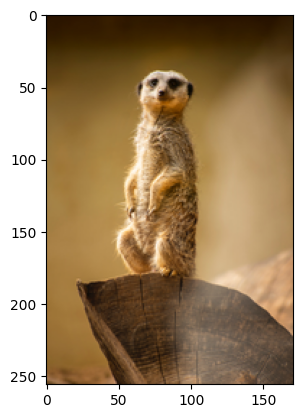

[('meerkat, mierkat', '66.8%'), ('mongoose', '7.0%'), ('marmot', '0.1%'), ('fox squirrel, eastern fox squirrel, Sciurus niger', '0.1%'), ('black-footed ferret, ferret, Mustela nigripes', '0.1%')]


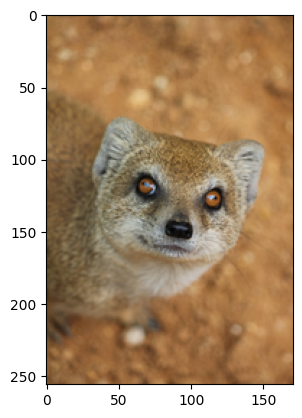

[('mongoose', '87.8%'), ('meerkat, mierkat', '0.2%'), ('guenon, guenon monkey', '0.1%'), ('indri, indris, Indri indri, Indri brevicaudatus', '0.1%'), ('black-footed ferret, ferret, Mustela nigripes', '0.1%')]


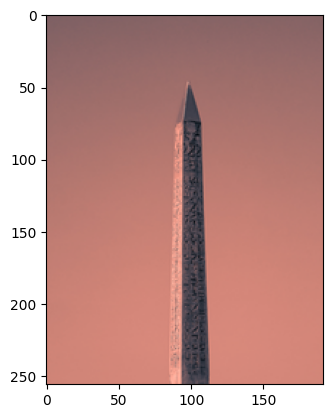

[('obelisk', '84.7%'), ('pedestal, plinth, footstall', '0.3%'), ('carbonara', '0.1%'), ('snow leopard, ounce, Panthera uncia', '0.1%'), ('nail', '0.1%')]


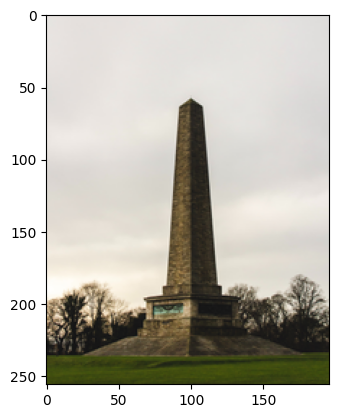

[('obelisk', '93.6%'), ('pedestal, plinth, footstall', '0.5%'), ('church, church building', '0.1%'), ('beacon, lighthouse, beacon light, pharos', '0.0%'), ('brass, memorial tablet, plaque', '0.0%')]


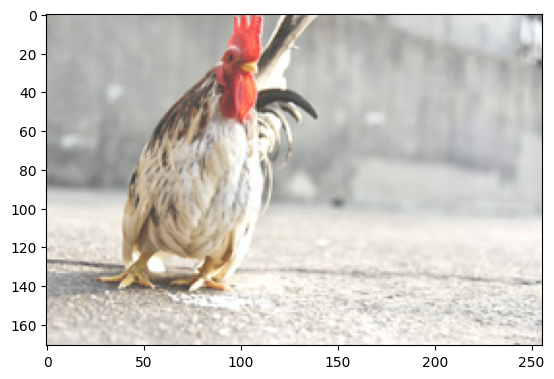

[('cock', '80.9%'), ('hen', '5.4%'), ('partridge', '0.1%'), ('barrow, garden cart, lawn cart, wheelbarrow', '0.1%'), ('black grouse', '0.1%')]


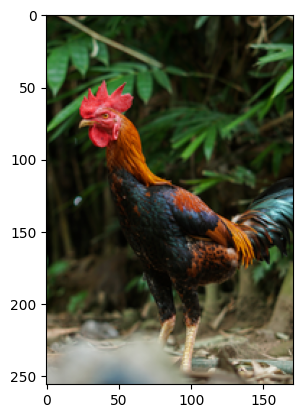

[('cock', '82.2%'), ('hen', '2.5%'), ('partridge', '0.5%'), ('agama', '0.1%'), ('night snake, Hypsiglena torquata', '0.1%')]


In [7]:
for uri, result in zip(uris, results):
    img = Image.open(uri)
    img.thumbnail((256,256), Image.ANTIALIAS)
    plt.imshow(img)
    plt.show()
    print(result)

In [8]:
# Convert predicted labels to class names
predicted_labels = [label[0][0] for label in results]

# Define the true labels and class names
true_labels = ['bee','bee','lynx, catamount','lynx, catamount','mongoose','mongoose','obelisk','obelisk','cock','cock']
class_names = ['bee','lynx, catamount','mongoose','obelisk','cock']

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels, average='weighted', labels=class_names)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted', labels=class_names)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted', labels=class_names)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
Accuracy: 0.90
F1-Score: 0.93
Precision: 1.00
Recall: 0.90


ResNet is a deep residual learning model for image recognition. With skip connections ResNet is able to create a loss of landscape creating a smooth path to the min via the gradient. It works in such a way where the weight layers learn residual functions with reference to the layer inputs that peroform identity mappings merged with layer outputs by addition.